# CSE 330 Numerical Analysis Lab 

### Lab 5

### Instructions
---

Todays assignment is to:
1. Implement Richardson Extrapolation method using Python

### Richardson Extrapolation:
We used central difference method to calculate derivatives of functions last week. Thise week we will use Richardson extrapolation to get a more accurate result.
Let,
$$ D_h = \frac{f(x_1+h) -f(x_1-h)}{2h}\tag{5.1}$$ 
Using Taylor's theorem to expand we get,

\begin{align}
f(x_1+h) &= f(x_1) + f^{\prime}(x_1)h + \frac{f^{\prime \prime}(x_1)}{2}h^2 + \frac{f^{\prime \prime \prime}(x_1)}{3!}h^3 + \frac{f^{(4)}(x_1)}{4!}h^4 + \frac{f^{(5)}(x_1)}{5!}h^5 + O(h^6)\tag{5.2} \\
f(x_1-h) &= f(x_1) - f^{\prime}(x_1)h + \frac{f^{\prime \prime}(x_1)}{2}h^2 - \frac{f^{\prime \prime \prime}(x_1)}{3!}h^3 + \frac{f^{(4)}(x_1)}{4!}h^4 - \frac{f^{(5)}(x_1)}{5!}h^5 + O(h^6)\tag{5.3}
\end{align}
Subtracting $5.3$ from $5.2$ we get,
$$ f(x_1+h) - f(x_1-h) = 2f^{\prime}(x_1)h + 2\frac{f^{\prime \prime \prime}(x_1)}{3!}h^3 + 2\frac{f^{(5)}(x_1)}{5!}h^5 + O(h^6)\tag{5.4}$$
So,
\begin{align}
D_h &= \frac{f(x_1+h) - f(x_1-h)}{2h} \\
&= \frac{1}{2h} \left( 2f^{\prime}(x_1)h + 2\frac{f^{\prime \prime \prime}(x_1)}{3!}h^3 + 2\frac{f^{(5)}(x_1)}{5!}h^5 + O(h^6) \right) \\
&= f^{\prime}(x_1) + \frac{f^{\prime \prime \prime}(x_1)}{6}h^2 + \frac{f^{(5)}(x_1)}{120}h^4 + O(h^6) \tag{5.5}
\end{align}
If we use $h, \text{and} \frac{h}{2}$ as step size in $5.5$, we get,
\begin{align}
D_h &= f^{\prime}(x_1) + f^{\prime \prime \prime}(x_1)\frac{h^2}{6} + f^{(5)}(x_1) \frac{h^4}{120} + O(h^6) \tag{5.6} \\
D_{h/2} &= f^{\prime}(x_1) + f^{\prime \prime \prime}(x_1)\frac{h^2}{2^2 . 6} + f^{(5)}(x_1) \frac{h^4}{2^4 . 120} + O(h^6) \tag{5.7}
\end{align}
Multiplying $5.7$ by $4$ and subtracting from $5.6$ we get,
\begin{align}
D_h - 4D_{h/2} &= -3f^{\prime} + f^{(5)}(x_1) \frac{h^4}{160} + O(h^6)\\ 
\Longrightarrow D^{(1)}_h = \frac{4D_{h/2} - D_h}{3} &= f^{\prime} - f^{(5)}(x_1) \frac{h^4}{480} + O(h^6) \tag{5.8}
\end{align}
Let's calculate the derivative using $5.8$


#### A. Let's import the necessary headers

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial


#### B. Let's create a function named `dh`
function `dh` takes three parameters as input: a function (`f`), a value `h` and a set of values `x`. It returns the derivatives of the function at each elements of array `x`.

In [35]:
def dh(f, h, x):
    '''
    Input:
        f: np.polynomial.Polynonimial type data. 
        h: floating point data.
        x: np.array type data.
    Output:
        return np.array type data of slope at each point x.
    '''
    return (f(x+h)-f(x-h))/(2*h);
    

####C. Let's create another funtion `dh1`.
`dh1` takes the same type of values as `dh` as input. It calculates the derivative using previously defined `dh` function and using equation $5.8$ and returns the values.

In [36]:
def dh1(f, h, x):
    '''
    Input:
        f: np.polynomial.Polynonimial type data. 
        h: floating point data.
        x: np.array type data.
    Output:
        return np.array type data of slope at each point x.
    '''
    return (4*dh(f,h/2,x) - dh(f,h,x))/3

####D. Now let's create an `error` function
`error` function takes a function `f` as input. It also takes a list of different values of h as `hs` and a specific value as `x_i` as input. It calculates the derivatives as point `x_i` using both functions described in **A** and **B**. 

In [37]:
def error(f, hs, x_i):
    '''
    Input:
        f  : np.polynomial.Polynonimial type data. 
        hs : np.array type data. list of h.
        x_i: floating point data. single value of x.
    Output:
        return two np.array type data of errors by two methods..
    '''
    f_prime = f.deriv(1)
    Y_actual = f_prime(x_i)

    diff_error = []
    diff2_error = []

    for h in hs:
        # for each values of hs calculate the error using both methods
        # and append those values into diff_error and diff2_error list.

        # write your code here
        diff_error.append(Y_actual - dh(f, h, x_i))
        diff2_error.append(Y_actual - dh1(f, h, x_i))
    
    print(pd.DataFrame({"h": hs, "Diff": diff_error, "Diff2": diff2_error}))

    return diff_error, diff2_error

####E. Finally let's run some tests

       h          Diff         Diff2
0  1.000  2.500000e-01  2.500000e-01
1  0.550  2.287656e-02  2.287656e-02
2  0.300  2.025000e-03  2.025000e-03
3  0.170  2.088025e-04  2.088025e-04
4  0.100  2.500000e-05  2.500000e-05
5  0.055  2.287656e-06  2.287656e-06
6  0.030  2.024986e-07  2.024986e-07
7  0.017  2.088073e-08  2.088073e-08
8  0.010  2.501793e-09  2.501793e-09


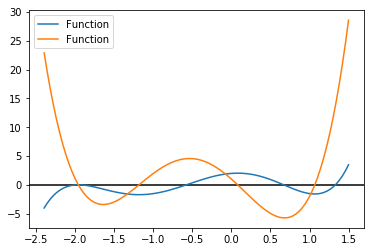

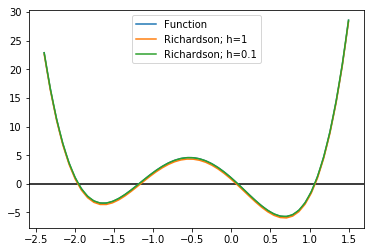

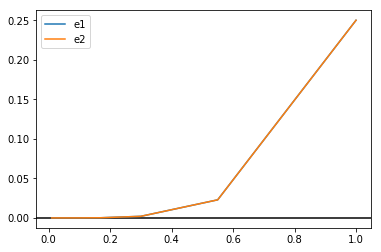

In [38]:
def draw_graph(f, ax, domain=[-10, 10], label=None):
    data = f.linspace(domain=domain)
    ax.plot(data[0], data[1], label='Function')

########
# Draw the graph and it's derivative
#######
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

p = Polynomial([2.0, 1.0, -6.0, -2.0, 2.5, 1.0])
p_prime = p.deriv(1)
draw_graph(p, ax, [-2.4, 1.5], 'Function')
draw_graph(p_prime, ax, [-2.4, 1.5], 'Derivative')

ax.legend()

########
# Draw the actual derivative and richardson derivative using
# h=1 and h=-0.1 as step size.
#######
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')

draw_graph(p_prime, ax, [-2.4, 1.5], 'actual')

h = 1
x = np.linspace(-2.4, 1.5, 50, endpoint=True)
y = dh1(p, h, x)
ax.plot(x, y, label='Richardson; h=1')

h = 0.1
x = np.linspace(-2.4, 1.5, 50, endpoint=True)
y = dh1(p, h, x)
ax.plot(x, y, label='Richardson; h=0.1')

ax.legend()

########
# Draw h-vs-error cuve
#######
fig, ax = plt.subplots()
ax.axhline(y=0, color='k')
hs = np.array([1., 0.55, 0.3, .17, 0.1, 0.055, 0.03, 0.017, 0.01])
e1, e2 = error(p, hs, 2.0)
ax.plot(hs, e1, label='e1')
ax.plot(hs, e2, label='e2')

ax.legend()

